# TCC - BASE 1 - Regressão
===================================================================================================================

Avaliação de técnicas de predição na determinação de preços de bens industriais - TCC

Alunos: Adriano Gonçalves da Silva / Fernando Nahid Leitão / Leonardo Carmo de Holanda

Matrícula: 192.671.008 / 192.671.055 / 192.671.058

E-mail: adrianogo@yahoo.com.br / fernando_nahid@hotmail.com / carmodeholanda@gmail.com

===================================================================================================================

## <font color='blue'>Pré-processamento</font>
===================================================================================================================

### <font color='green'>Carregamento das bibliotecas</font>

*Importando as bibliotecas necessárias para o trabalho*

In [ ]:
import nltk
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import scale
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.anova import anova_lm

import matplotlib.pyplot as plt
import seaborn as sns

import graphs

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### <font color='green'>Leitura dos dados</font>

*Leitura do arquivo BASE1_ETAPA3_v1.csv*

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
data = pd.read_csv('BASE1_ETAPA3_v1.csv', encoding="ISO-8859-1", nrows=None, sep=';')
data.head()

ABNT_NBR_15980 ESPECIFICA_MATERIAL NBR_6109  ... VOLUME id   VALOR
0         NENHUM            ASTM A36   NENHUM  ...  652.8  1  112.02
1         NENHUM            ASTM A36   NENHUM  ...  652.8  2  112.02
2         NENHUM            ASTM A36   NENHUM  ...  652.8  3  112.02
3         NENHUM            ASTM A36   NENHUM  ...  652.8  4  112.02
4         NENHUM            ASTM A36   NENHUM  ...  652.8  5  112.02

[5 rows x 11 columns]

*Análise exploratória da base*

In [ ]:
data.shape

(1682, 11)

In [ ]:
data.columns

Index(['ABNT_NBR_15980', 'ESPECIFICA_MATERIAL', 'NBR_6109',
       'REVESTIMENTO_PROTE', 'DESCRICAO_ASTM_A6', 'DESCRICAO_ASTM_A6M',
       'DESCRICAO_NBR_6352', 'TIPO_NORMA_PERFIL', 'VOLUME', 'id', 'VALOR'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ABNT_NBR_15980       1682 non-null   object 
 1   ESPECIFICA_MATERIAL  1682 non-null   object 
 2   NBR_6109             1682 non-null   object 
 3   REVESTIMENTO_PROTE   1682 non-null   object 
 4   DESCRICAO_ASTM_A6    1682 non-null   object 
 5   DESCRICAO_ASTM_A6M   1682 non-null   object 
 6   DESCRICAO_NBR_6352   1682 non-null   object 
 7   TIPO_NORMA_PERFIL    1682 non-null   object 
 8   VOLUME               1682 non-null   float64
 9   id                   1682 non-null   int64  
 10  VALOR                1682 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 144.7+ KB


In [ ]:
data.isnull().sum()

ABNT_NBR_15980         0
ESPECIFICA_MATERIAL    0
NBR_6109               0
REVESTIMENTO_PROTE     0
DESCRICAO_ASTM_A6      0
DESCRICAO_ASTM_A6M     0
DESCRICAO_NBR_6352     0
TIPO_NORMA_PERFIL      0
VOLUME                 0
id                     0
VALOR                  0
dtype: int64

## <font color='blue'>Tratamentos dos dados</font>
===================================================================================================================

### <font color='green'>Ajustes na base</font>

*Retirada da coluna id*

In [ ]:
data = data.drop(columns=['id'])

*Ajustes nos nomes das colunas*

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enconder = LabelEncoder()
labels_ABNT_NBR_15980 = label_enconder.fit_transform(data.ABNT_NBR_15980)
data['abnt_nbr'] = labels_ABNT_NBR_15980
labels_ESPECIFICA_MATERIAL = label_enconder.fit_transform(data.ESPECIFICA_MATERIAL)
data['especifica_mat'] = labels_ESPECIFICA_MATERIAL
labels_NBR_6109 = label_enconder.fit_transform(data.NBR_6109)
data['nbr_6109'] = labels_NBR_6109
labels_REVESTIMENTO_PROTE = label_enconder.fit_transform(data.REVESTIMENTO_PROTE)
data['revest_prote'] = labels_REVESTIMENTO_PROTE
labels_DESCRICAO_ASTM_A6 = label_enconder.fit_transform(data.DESCRICAO_ASTM_A6)
data['descr_astm_a6'] = labels_DESCRICAO_ASTM_A6
labels_DESCRICAO_ASTM_A6M = label_enconder.fit_transform(data.DESCRICAO_ASTM_A6M)
data['descr_astm_a6m'] = labels_DESCRICAO_ASTM_A6M
labels_DESCRICAO_NBR_6352 = label_enconder.fit_transform(data.DESCRICAO_NBR_6352)
data['descr_nbr_6352'] = labels_DESCRICAO_NBR_6352
labels_TIPO_NORMA_PERFIL = label_enconder.fit_transform(data.TIPO_NORMA_PERFIL)
data['tipo_norma_perfil'] = labels_TIPO_NORMA_PERFIL

In [ ]:
data = data.drop(['ABNT_NBR_15980', 'ESPECIFICA_MATERIAL', 'NBR_6109', 'REVESTIMENTO_PROTE', 'DESCRICAO_ASTM_A6', 'DESCRICAO_ASTM_A6M', 'DESCRICAO_NBR_6352', 'TIPO_NORMA_PERFIL'], axis=1)

In [ ]:
data.head()

VOLUME   VALOR  abnt_nbr  ...  descr_astm_a6m  descr_nbr_6352  tipo_norma_perfil
0   652.8  112.02        19  ...              23               1                  0
1   652.8  112.02        19  ...              23               1                  0
2   652.8  112.02        19  ...              23               1                  0
3   652.8  112.02        19  ...              23               1                  0
4   652.8  112.02        19  ...              23               1                  0

[5 rows x 10 columns]

*Visualização de histograma*

In [ ]:
data['VALOR'].hist(bins = 30)

*Visualização da base*

In [ ]:
data.head()

VOLUME   VALOR  abnt_nbr  ...  descr_astm_a6m  descr_nbr_6352  tipo_norma_perfil
0   652.8  112.02        19  ...              23               1                  0
1   652.8  112.02        19  ...              23               1                  0
2   652.8  112.02        19  ...              23               1                  0
3   652.8  112.02        19  ...              23               1                  0
4   652.8  112.02        19  ...              23               1                  0

[5 rows x 10 columns]

In [ ]:
data.shape

(1682, 10)

*Padronizar a base*

In [ ]:
from sklearn.preprocessing import StandardScaler
data_cols = data.columns
scaler = StandardScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns=data_cols)
data.head()

VOLUME     VALOR  ...  descr_nbr_6352  tipo_norma_perfil
0 -0.163503 -0.362689  ...         0.02439          -0.479267
1 -0.163503 -0.362689  ...         0.02439          -0.479267
2 -0.163503 -0.362689  ...         0.02439          -0.479267
3 -0.163503 -0.362689  ...         0.02439          -0.479267
4 -0.163503 -0.362689  ...         0.02439          -0.479267

[5 rows x 10 columns]

## <font color='blue'>Modelo de regressão múltipla linear</font>
===================================================================================================================

### <font color='green'>Análise de correlação</font>

*Matriz de correlação*

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap="viridis", fmt="0.2f");

*Analise de: Volume x Valor*

Text(0, 0.5, 'VALOR')

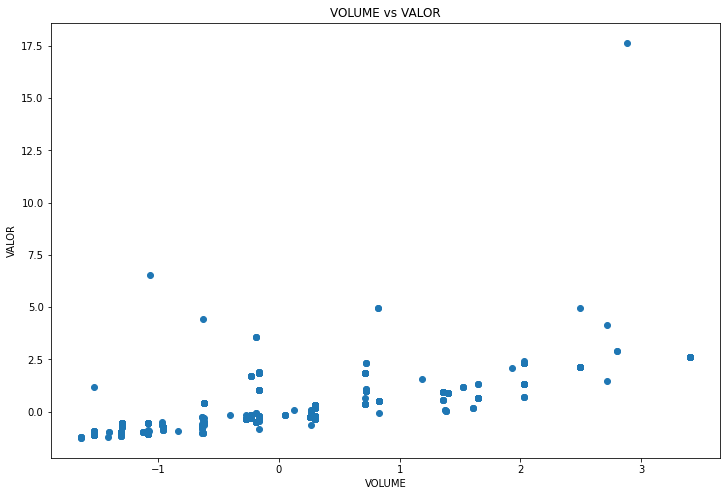

In [ ]:
X = data['VOLUME']
y = data['VALOR']
plt.scatter(x=X, y=y)
plt.title('VOLUME vs VALOR')
plt.xlabel('VOLUME')
plt.ylabel('VALOR')

### <font color='green'>Modelo 1</font>

*Sumário do modelo*

In [ ]:
data1 = data
X = sm.add_constant(data1.drop('VALOR', axis=1))
y = data1['VALOR']
X.sample(5)

const    VOLUME  ...  descr_nbr_6352  tipo_norma_perfil
756     1.0 -0.962279  ...         0.02439          -0.479267
1192    1.0  2.030912  ...         0.02439          -0.479267
638     1.0  0.724026  ...         0.02439          -0.479267
1652    1.0 -0.632035  ...         0.02439           1.788320
640     1.0  0.724026  ...         0.02439          -0.479267

[5 rows x 10 columns]

In [ ]:
model1 = sm.OLS(y, X.astype(float)).fit()

In [ ]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALOR   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     542.6
Date:                Tue, 12 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:47:54   Log-Likelihood:                -1237.6
No. Observations:                1682   AIC:                             2495.
Df Residuals:                    1672   BIC:                             2549.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.621e-16      0.01

*Gráfico qq*

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:695: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


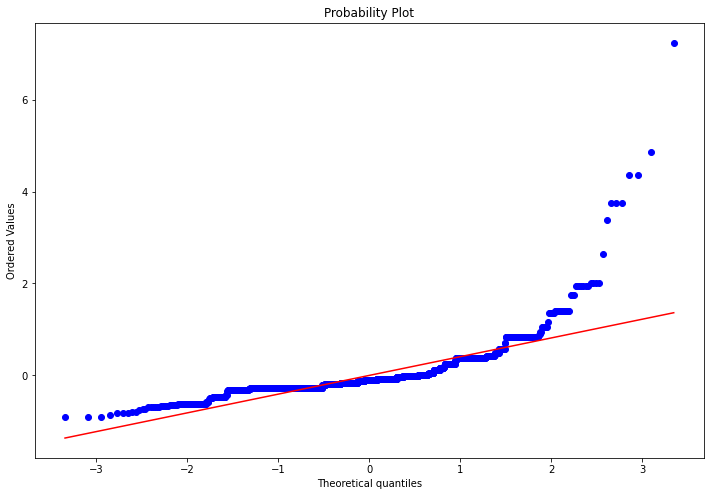

In [ ]:
graph_plotter = graphs.AssumptionGraphs(model1)
graph_plotter.plot_qq()

*Gráfico de resíduos x ajustados*

In [ ]:
graph_plotter.plot_residual_fitted_values(y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


*Gráfico de resíduos padronizados*

In [ ]:
graph_plotter.plot_scale_location()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


*Gráfico de outlier*

In [ ]:
graph_plotter.plot_influence()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/content/graphs.py:70: RuntimeWarning: invalid value encountered in sqrt
  graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
/content/graphs.py:74: RuntimeWarning: invalid value encountered in sqrt
  graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),


*Fator de inflação da variância*

In [ ]:
pd.Series([variance_inflation_factor(X.values, i) 
           for i in range(X.shape[1])], 
           index=X.columns)

const                  1.000000
VOLUME                 1.289600
abnt_nbr               4.132047
especifica_mat         1.156933
nbr_6109               2.523847
revest_prote           1.081432
descr_astm_a6        178.523912
descr_astm_a6m       172.084827
descr_nbr_6352         1.021463
tipo_norma_perfil      3.000393
dtype: float64

*Gráfico de regressão parcial ou de variável agregada*

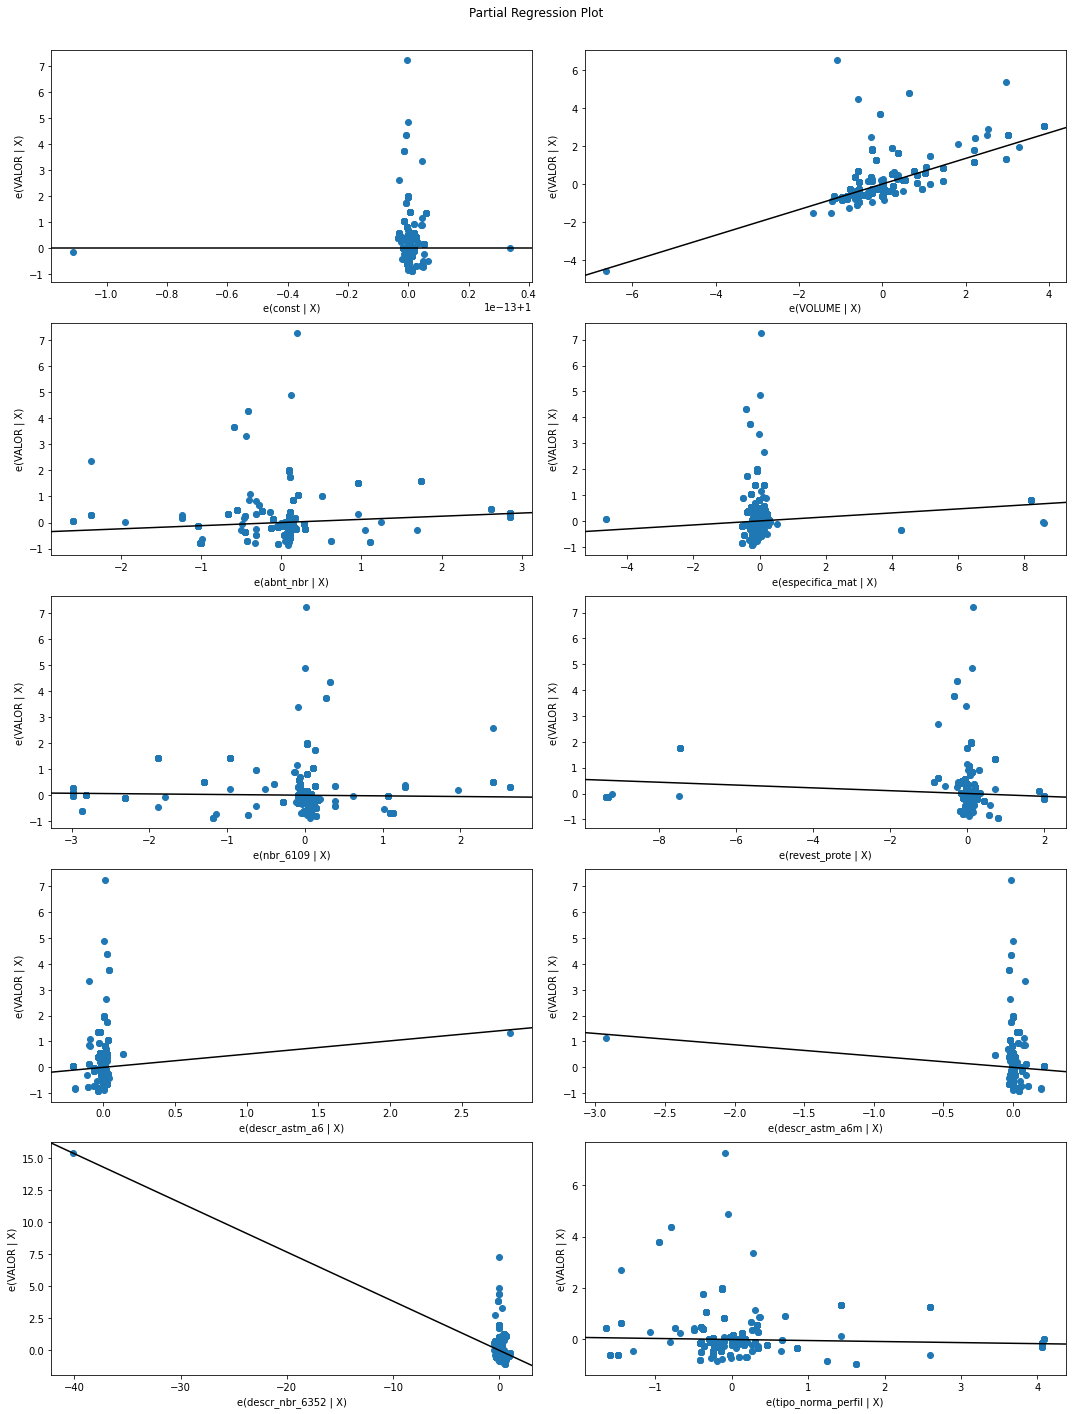

In [ ]:
fig = plt.figure(figsize=(15, 20))
sm.graphics.plot_partregress_grid(model1, fig=fig);

<font color='green'>Pelos gráficos acima, vemos que as variáveis 'nbr_6109' e 'tipo_norma_perfil' não agregam muito ao modelo pois seus gráficos estão praticamente na horizontal.Já havíamos observado um p-valor não significante para o modelo, superior a 0,05.

<font color='green'>Analisando a premissa de multicolinearidade através do cálculo da inflação da variância, vemos que os atributos 'descr_astm_a6' e 'descr_astm_a6m' tem grande influência, em comparação com as demais variáveis do modelo. Acreditamos que elas podem ser explicadas por outras variáveis. Sendo assim, elas também foram removidas do modelo.

<font color='green'>O id 1289 também se apresenta como possível outlier e será retirado do modelo.

### <font color='green'>Modelo 1 - Otimizado</font>

*Carregando o modelo*

In [ ]:
data1_o = data
data1_o = data1_o.drop(['nbr_6109', 'tipo_norma_perfil', 'descr_astm_a6', 'descr_astm_a6m'], axis=1)
data1_o.drop(1289)

VOLUME     VALOR  ...  revest_prote  descr_nbr_6352
0    -0.163503 -0.362689  ...      0.106888         0.02439
1    -0.163503 -0.362689  ...      0.106888         0.02439
2    -0.163503 -0.362689  ...      0.106888         0.02439
3    -0.163503 -0.362689  ...      0.106888         0.02439
4    -0.163503 -0.362689  ...      0.106888         0.02439
...        ...       ...  ...           ...             ...
1677 -0.632035 -0.710670  ...      0.106888         0.02439
1678 -0.632035 -0.710670  ...      0.106888         0.02439
1679 -0.632035 -0.710670  ...      0.106888         0.02439
1680 -0.632035 -0.710670  ...      0.106888         0.02439
1681 -0.632035 -0.710670  ...      0.106888         0.02439

[1681 rows x 6 columns]

*Sumário do modelo*

In [ ]:
X = sm.add_constant(data1_o.drop('VALOR', axis=1))
y = data1_o['VALOR']
X.sample(5)

const    VOLUME  abnt_nbr  especifica_mat  revest_prote  descr_nbr_6352
1293    1.0  2.797542  0.473134       -0.106568      0.106888         0.02439
172     1.0 -0.163503  0.473134       -0.106568      0.106888         0.02439
503     1.0 -1.530297  0.473134       -0.106568      0.106888         0.02439
945     1.0 -0.163503  0.473134       -0.106568      0.106888         0.02439
1118    1.0  0.298012  0.473134       -0.106568      0.106888         0.02439

In [ ]:
model1_o = sm.OLS(y, X.astype(float)).fit()

In [ ]:
print(model1_o.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALOR   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     954.1
Date:                Tue, 12 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:47:59   Log-Likelihood:                -1253.8
No. Observations:                1682   AIC:                             2520.
Df Residuals:                    1676   BIC:                             2552.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.621e-16      0.012   -2.1e

### <font color='green'>Modelo 2</font>

*Carregando o modelo*

In [ ]:
data2 = data
X = sm.add_constant(data2.drop('VALOR', axis=1))
y = data2['VALOR']
X.sample(5)
model2 = sm.OLS(y, X.astype(float)).fit()
from sklearn.model_selection import train_test_split 

*Fazendo a separação do modelo*

In [ ]:
X = data2.loc[:,data2.columns != 'VALOR']  # Entrada
y = data2.VALOR    # Saída
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # Treino e teste

*Treinando o modelo*

In [ ]:
from sklearn.linear_model import LinearRegression
def train_and_predict(X_train, y_train, X_test):
  model2 = LinearRegression(normalize=True)
  model2.fit(X_train, y_train);
  y_pred = model2.predict(X_test) #inferência do teste
  return model2, y_pred
model2, y_pred = train_and_predict(X_train, y_train, X_test)

In [ ]:
def evaluate(y_test, y_pred, X_test):  
  # R2
  from sklearn.metrics import r2_score
  r2 = r2_score(y_test, y_pred)
  print('R2: ', r2)
  n = len(y_test)
  p = X_test.shape[1]
  adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
  print('R2 ajustado: ', adj_r2)
evaluate(y_test, y_pred, X_test)

R2:  0.025632367361329567
R2 ajustado:  -0.0011850904177164168


*Equação de R ajustado*

In [ ]:
model2.intercept_

0.010216851170770725

In [ ]:
model2.coef_

array([ 0.60857876,  0.15054373,  0.08227403, -0.0202564 , -0.05476999,
        4.5905882 , -4.48430641, -0.38712911, -0.06529456])

In [ ]:
data2.head()

VOLUME     VALOR  ...  descr_nbr_6352  tipo_norma_perfil
0 -0.163503 -0.362689  ...         0.02439          -0.479267
1 -0.163503 -0.362689  ...         0.02439          -0.479267
2 -0.163503 -0.362689  ...         0.02439          -0.479267
3 -0.163503 -0.362689  ...         0.02439          -0.479267
4 -0.163503 -0.362689  ...         0.02439          -0.479267

[5 rows x 10 columns]

*Previsto x realizado*

In [ ]:
plt.scatter(x=y_test, y=y_pred)
plt.title('Previsto vs Real')
plt.xlabel('Real')
plt.ylabel('Previsto')

x = [min(y_test), max(y_test)]
plt.plot(x, x, color='red'); #reta onde y=x

*Carregando o modelo*

### <font color='green'>Modelo 2 - Otimizado</font>

*Carregando o modelo*

In [ ]:
data2_o = data
data2_o = data2_o.drop(['nbr_6109', 'tipo_norma_perfil', 'descr_astm_a6', 'descr_astm_a6m'], axis=1)
data2_o.drop(1289)
X = sm.add_constant(data2_o.drop('VALOR', axis=1))
y = data2_o['VALOR']
X.sample(5)
model2_o = sm.OLS(y, X.astype(float)).fit()
from sklearn.model_selection import train_test_split 

*Fazendo a separação do modelo*

In [ ]:
X = data2_o.loc[:,data2_o.columns != 'VALOR']  # Entrada
y = data2_o.VALOR    # Saída
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # Treino e teste

*Treinando o modelo*

In [ ]:
from sklearn.linear_model import LinearRegression
def train_and_predict(X_train, y_train, X_test):
  model2_o = LinearRegression(normalize=True)
  model2_o.fit(X_train, y_train);
  y_pred = model2_o.predict(X_test) #inferência do teste
  return model2_o, y_pred
model2_o, y_pred = train_and_predict(X_train, y_train, X_test)

In [ ]:
def evaluate(y_test, y_pred, X_test):  
  # R2
  from sklearn.metrics import r2_score
  r2 = r2_score(y_test, y_pred)
  print('R2: ', r2)
  n = len(y_test)
  p = X_test.shape[1]
  adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
  print('R2 ajustado: ', adj_r2)
evaluate(y_test, y_pred, X_test)

R2:  0.3877500554648309
R2 ajustado:  0.37850156687668635


*Equação de R ajustado*

In [ ]:
model2_o.intercept_

-0.01079629137313753

In [ ]:
model2_o.coef_

array([ 0.70339346,  0.07984938,  0.10052116, -0.03935747,  0.        ])

In [ ]:
data2_o.head()

VOLUME     VALOR  abnt_nbr  especifica_mat  revest_prote  descr_nbr_6352
0 -0.163503 -0.362689  0.473134       -0.106568      0.106888         0.02439
1 -0.163503 -0.362689  0.473134       -0.106568      0.106888         0.02439
2 -0.163503 -0.362689  0.473134       -0.106568      0.106888         0.02439
3 -0.163503 -0.362689  0.473134       -0.106568      0.106888         0.02439
4 -0.163503 -0.362689  0.473134       -0.106568      0.106888         0.02439

*Previsto x realizado*

In [ ]:
plt.scatter(x=y_test, y=y_pred)
plt.title('Previsto vs Real')
plt.xlabel('Real')
plt.ylabel('Previsto')

x = [min(y_test), max(y_test)]
plt.plot(x, x, color='red'); #reta onde y=x

## <font color='blue'>Modelo de regressão múltipla polinomial</font>
===================================================================================================================

### <font color='green'>Modelo 3</font>

*Carregando o modelo*

In [ ]:
data3 = data
data3 = data3.drop(['nbr_6109', 'tipo_norma_perfil', 'descr_astm_a6', 'descr_astm_a6m'], axis=1)
data3.drop(1289)

VOLUME     VALOR  ...  revest_prote  descr_nbr_6352
0    -0.163503 -0.362689  ...      0.106888         0.02439
1    -0.163503 -0.362689  ...      0.106888         0.02439
2    -0.163503 -0.362689  ...      0.106888         0.02439
3    -0.163503 -0.362689  ...      0.106888         0.02439
4    -0.163503 -0.362689  ...      0.106888         0.02439
...        ...       ...  ...           ...             ...
1677 -0.632035 -0.710670  ...      0.106888         0.02439
1678 -0.632035 -0.710670  ...      0.106888         0.02439
1679 -0.632035 -0.710670  ...      0.106888         0.02439
1680 -0.632035 -0.710670  ...      0.106888         0.02439
1681 -0.632035 -0.710670  ...      0.106888         0.02439

[1681 rows x 6 columns]

*Polinomial de 2ª ordem*

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
polynomial_features = PolynomialFeatures(degree=2)
xpoly = polynomial_features.fit_transform(X)
xpoly.shape

(1682, 21)

In [ ]:
model3 = sm.OLS(y, xpoly).fit()
ypred = model3.predict(xpoly) 
ypred.shape
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALOR   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     412.5
Date:                Tue, 12 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:48:01   Log-Likelihood:                -1228.1
No. Observations:                1682   AIC:                             2482.
Df Residuals:                    1669   BIC:                             2553.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0780      0.019     -4.071      0.0

*Polinomial de 3ª ordem*

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
xpoly = polynomial_features.fit_transform(X)
xpoly.shape

(1682, 56)

In [ ]:
model3 = sm.OLS(y, xpoly).fit()
ypred = model3.predict(xpoly) 
ypred.shape
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALOR   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     265.5
Date:                Tue, 12 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:48:01   Log-Likelihood:                -1213.3
No. Observations:                1682   AIC:                             2467.
Df Residuals:                    1662   BIC:                             2575.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2588      0.083     -3.131      0.0

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=4)
xpoly = polynomial_features.fit_transform(X)
xpoly.shape

(1682, 126)

In [ ]:
model3 = sm.OLS(y, xpoly).fit()
ypred = model3.predict(xpoly) 
ypred.shape
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALOR   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     206.0
Date:                Tue, 12 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:48:01   Log-Likelihood:                -1198.0
No. Observations:                1682   AIC:                             2448.
Df Residuals:                    1656   BIC:                             2589.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8155      0.731      1.116      0.2

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=5)
xpoly = polynomial_features.fit_transform(X)
xpoly.shape

(1682, 252)

In [ ]:
model3 = sm.OLS(y, xpoly).fit()
ypred = model3.predict(xpoly) 
ypred.shape
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALOR   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     179.6
Date:                Tue, 12 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:48:01   Log-Likelihood:                -1124.6
No. Observations:                1682   AIC:                             2315.
Df Residuals:                    1649   BIC:                             2494.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.3733      4.948     -1.490      0.1

In [ ]:
import altair as alt

x = y_test
y = y_pred
source = pd.DataFrame({"x": x, "y": y})

degree_list = [1, 2, 3, 4]

base = alt.Chart(source).mark_circle(color="black").encode(
        alt.X("x"), alt.Y("y")
)

polynomial_fit = [
    base.transform_regression(
        "x", "y", method="poly", order=order, as_=["x", str(order)]
    )
    .mark_line()
    .transform_fold([str(order)], as_=["degree", "y"])
    .encode(alt.Color("degree:N"))
    for order in degree_list
]

alt.layer(base, *polynomial_fit)

alt.LayerChart(...)